# 0. Run the backtest code

In [ ]:
# Ru 15min test
!python ../Main.py -o ../Results/Ru_15min_PriceThreshold_FixCost -c ../Config/Ru_15min_PriceThreshold_FixCost.json > /dev/null

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

# 1. Ru - 15min 

In [21]:
Ru_15min_result = GetResult("../Results/Ru_15min_PriceThreshold_FixCost/")


Tester= 0 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ru_15min_PriceThreshold_FixCost/Result_11.pkl

Tester= 12 |file_path =

## 1.0 Rb - 15min offset average - group test results by price threshold

In [3]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [22]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[], 5:[], 10:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[],5:[], 10:[]}

for result in Ru_15min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# Fixed trading cost

## 1.1 Ru --- 15min offset average --- price threshold = 10bps
## Highest In-Sample Return = 1.36 & Sharpe = 3.48 (3-order model)
## But bad out-of-sample performance

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

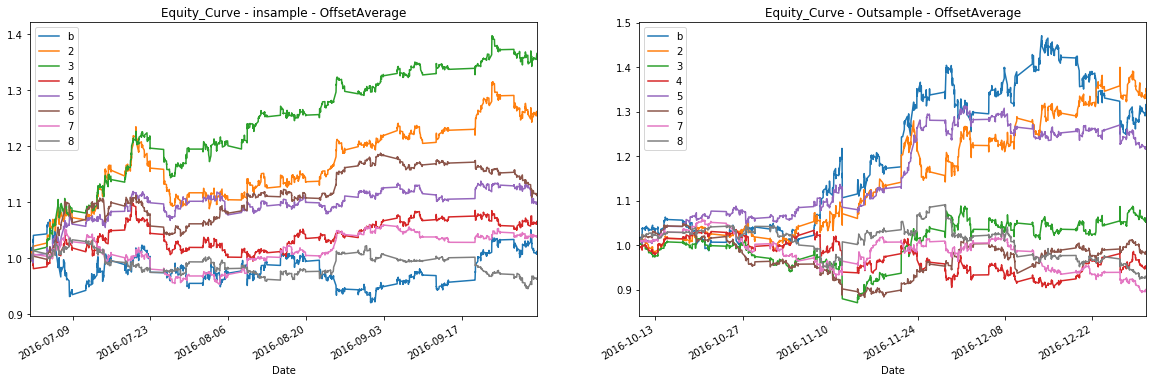

In [23]:
Ru_15min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[10e-4])

Benchmark = Ru_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [24]:
Ru_15min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.271135,0.003747,-0.003042,0.005105,0.000400,-0.016084,0.038153,-0.127921,1.679372,3.484829,598.8,1.258499,0.422491
1,0.270101,0.004953,-0.003165,0.005313,0.000600,-0.018146,0.038361,-0.088247,1.676625,4.591220,570.2,1.361134,0.444158
2,0.286779,0.001050,-0.003670,0.004833,0.000107,-0.033034,0.029387,-0.138202,1.321802,0.907788,598.2,1.060424,0.444427
3,0.293721,0.001518,-0.003720,0.004805,0.000181,-0.031167,0.033888,-0.121173,1.298708,1.381040,564.8,1.101018,0.457704
4,0.294331,0.001714,-0.004023,0.004802,0.000207,-0.036857,0.030459,-0.116360,1.193869,1.433739,530.0,1.106271,0.479081
5,0.287261,0.000645,-0.004326,0.005219,0.000096,-0.034206,0.028316,-0.151762,1.217099,0.533427,442.0,1.049508,0.463658
6,0.264890,-0.000554,-0.005462,0.005863,-0.000122,-0.035917,0.030236,-0.159217,1.075657,-0.487030,312.0,0.958136,0.472002


In [25]:
Ru_15min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.377862,0.005263,-0.004339,0.007184,0.000533,-0.037134,0.077030,-0.112215,1.663079,3.506420,593.2,1.341883,0.422712
1,0.390038,0.001095,-0.005000,0.007428,0.000099,-0.050771,0.066526,-0.191733,1.486296,0.716242,540.4,1.063760,0.412509
2,0.439176,-0.000701,-0.005507,0.006311,-0.000073,-0.051652,0.048980,-0.210724,1.156487,-0.286506,586.4,0.953304,0.459768
3,0.413595,0.003406,-0.005721,0.006499,0.000407,-0.053565,0.045908,-0.168288,1.140037,2.064094,543.2,1.220907,0.501159
4,0.442307,-0.000191,-0.006211,0.006920,-0.000038,-0.041090,0.043877,-0.208107,1.121264,-0.092833,486.6,0.976290,0.470509
5,0.418710,-0.001708,-0.006820,0.007153,-0.000257,-0.054143,0.054369,-0.220677,1.056882,-1.045934,411.2,0.887332,0.469711
6,0.422618,-0.001136,-0.007726,0.007862,-0.000211,-0.051257,0.058386,-0.225672,1.019459,-0.634380,316.4,0.915812,0.481981


## 2.2  Ru --- 15min offset average --- price threshold = 10
## Hightest Out-of-Sample Return = 1.400576  (2-order model)

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

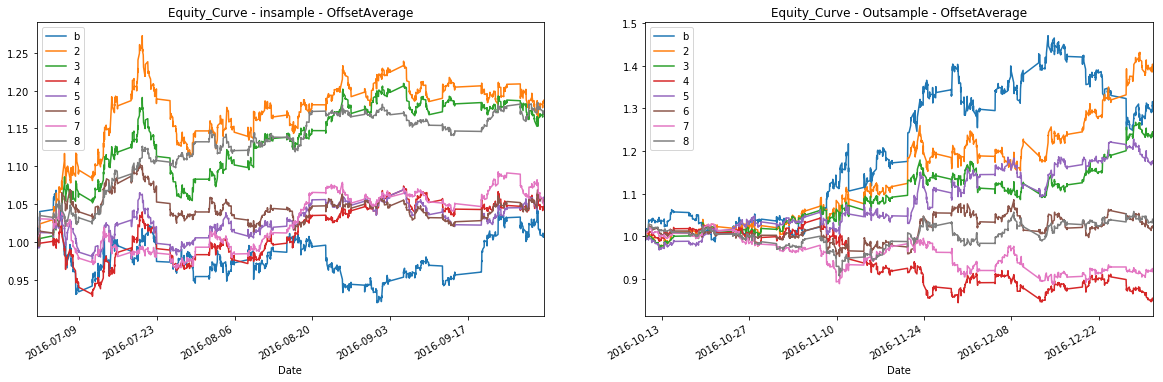

In [26]:
Ru_15min_Offset_Average_10d = OffSetAverage(FixedCost_Result_Group[10])

Benchmark = Ru_15min_Offset_Average_10d.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_10d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [9]:
Ru_15min_Offset_Average_10d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.269552,0.003287,-0.003050,0.004621,0.000298,-0.016178,0.041702,-0.130307,1.518042,3.124906,705.0,1.224020,0.423226
1,0.287064,0.003036,-0.003232,0.004681,0.000331,-0.020924,0.040684,-0.126827,1.448733,2.696318,661.4,1.206521,0.436663
2,0.269769,0.001194,-0.003777,0.004518,0.000143,-0.034333,0.027168,-0.146352,1.207778,1.110050,583.6,1.076713,0.462501
3,0.281975,0.001426,-0.003498,0.004170,0.000131,-0.031540,0.029836,-0.135162,1.196194,1.293599,682.0,1.096779,0.459568
4,0.270795,0.001351,-0.003732,0.004127,0.000124,-0.030536,0.032123,-0.152297,1.110264,1.576351,677.6,1.097260,0.477393
5,0.271333,0.001313,-0.003659,0.004039,0.000116,-0.029208,0.026538,-0.135304,1.112082,1.278842,708.8,1.089955,0.474247
6,0.286463,0.002993,-0.003556,0.004250,0.000287,-0.028994,0.029159,-0.090769,1.196865,2.584831,669.2,1.208479,0.477646


In [27]:
Ru_15min_Offset_Average_10d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.367935,0.005889,-0.004078,0.006687,0.000546,-0.038153,0.064530,-0.109105,1.642880,3.955157,650.2,1.400576,0.429087
1,0.350179,0.003805,-0.004565,0.006960,0.000391,-0.042474,0.059838,-0.126736,1.536233,2.616876,603.4,1.239235,0.431603
2,0.385073,-0.002409,-0.005632,0.006417,-0.000279,-0.053621,0.041850,-0.265376,1.174799,-1.557055,556.2,0.885814,0.443697
3,0.398307,0.002912,-0.004938,0.006150,0.000267,-0.052252,0.054969,-0.134760,1.248527,1.838114,637.0,1.167948,0.469511
4,0.431689,0.000543,-0.005253,0.005957,0.000042,-0.048655,0.050703,-0.215342,1.143607,0.224890,632.8,1.035707,0.472316
5,0.444317,-0.001264,-0.005133,0.005814,-0.000118,-0.047095,0.044952,-0.241520,1.134059,-0.728413,660.0,0.921881,0.458531
6,0.415406,0.000796,-0.005208,0.005740,0.000079,-0.044650,0.044952,-0.222260,1.104021,0.572431,656.8,1.055517,0.482910


## 2.3  Ru --- 15min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

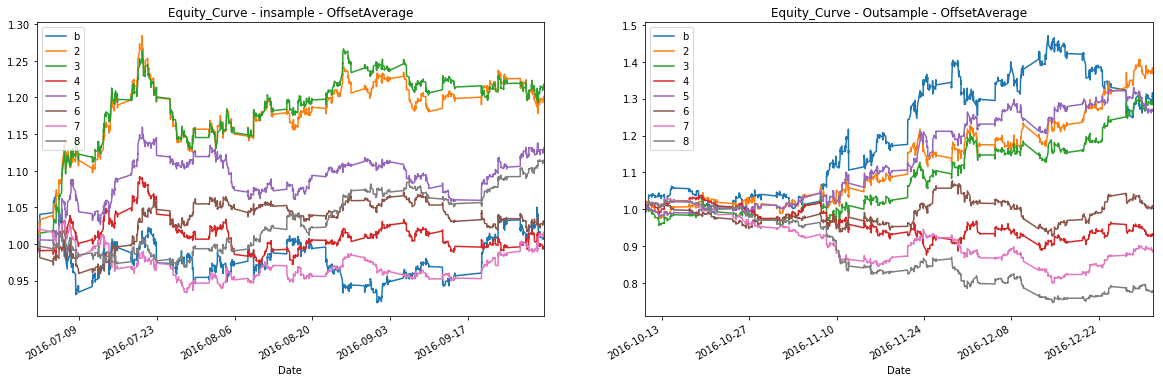

In [28]:
Ru_15min_Offset_Average_5bps = OffSetAverage(FixedCost_Result_Group[5e-4])

Benchmark = Ru_15min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [31]:
Ru_15min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.292239,2.992702e-03,-0.002895,0.004943,0.000285,-0.016077,0.045469,-0.144209,1.708248,2.617688,675.0,1.199350,0.405660
1,0.277888,3.189876e-03,-0.002788,0.004222,0.000258,-0.017079,0.039752,-0.128143,1.522019,2.970730,792.6,1.216747,0.434356
2,0.285104,4.306741e-07,-0.003405,0.004207,-0.000003,-0.030695,0.029942,-0.163808,1.247690,-0.061211,679.0,0.991977,0.446027
3,0.293810,2.002014e-03,-0.003340,0.004338,0.000190,-0.030660,0.034431,-0.151387,1.299644,1.685810,684.8,1.128471,0.459747
4,0.276445,5.436582e-04,-0.003487,0.004081,0.000052,-0.028713,0.030007,-0.131012,1.171183,0.462615,683.0,1.027385,0.467637
5,0.297502,2.741254e-04,-0.003755,0.004348,0.000027,-0.030976,0.029008,-0.146893,1.161005,0.274510,639.0,1.009343,0.466608
6,0.274212,1.703037e-03,-0.004263,0.004859,0.000213,-0.028472,0.029622,-0.149707,1.153368,1.687110,486.8,1.123963,0.490979


In [32]:
Ru_15min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.364094,0.005648,-0.004114,0.006774,0.000528,-0.038153,0.070236,-0.093657,1.650254,3.870057,642.8,1.373114,0.426225
1,0.382548,0.004409,-0.004100,0.006004,0.000367,-0.041986,0.059806,-0.108164,1.477286,2.892105,723.2,1.281416,0.441942
2,0.402278,-0.000963,-0.005183,0.006109,-0.000108,-0.049001,0.042836,-0.217473,1.192979,-0.538115,625.0,0.945425,0.449288
3,0.432223,0.004188,-0.005061,0.006013,0.000377,-0.050555,0.051167,-0.140369,1.190358,2.465100,659.6,1.267169,0.490880
4,0.404316,0.000295,-0.005320,0.005853,0.000016,-0.044087,0.052023,-0.237568,1.104598,0.329196,646.6,1.013138,0.477986
5,0.431620,-0.001918,-0.005444,0.005803,-0.000185,-0.052100,0.045714,-0.300254,1.068370,-1.282543,625.8,0.890494,0.467320
6,0.481942,-0.004044,-0.006526,0.006221,-0.000481,-0.049086,0.045311,-0.345802,0.955480,-2.164070,503.2,0.771847,0.474264


## 2.4  Ru --- 15min offset average --- price threshold = 5
## Highest Out-of-Sample Sharpe Ratio = 4.009096 (2-order model)

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

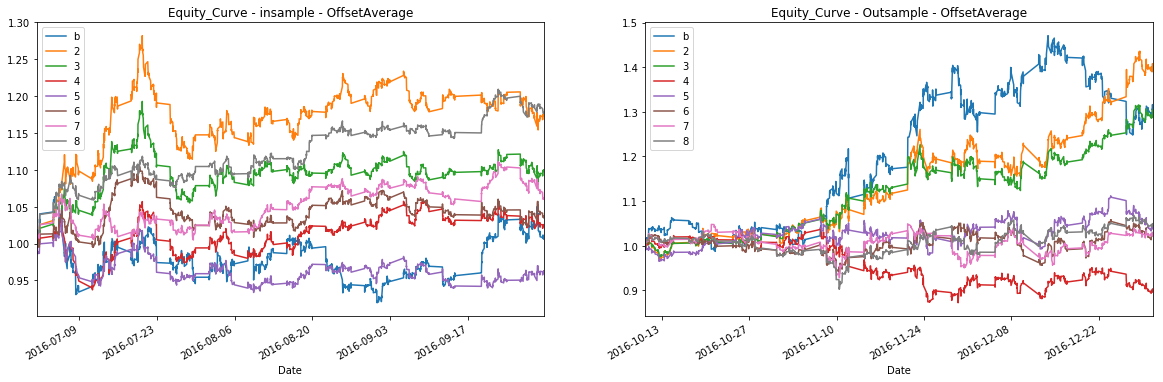

In [33]:
Ru_15min_Offset_Average_5d = OffSetAverage(FixedCost_Result_Group[5])

Benchmark = Ru_15min_Offset_Average_5d.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_5d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [34]:
Ru_15min_Offset_Average_5d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.278003,0.002651,-0.002855,0.004688,0.000239,-0.016223,0.041657,-0.141824,1.643878,2.426872,709.4,1.174103,0.410189
1,0.292084,0.001556,-0.003189,0.004886,0.000193,-0.022337,0.037914,-0.163586,1.540464,1.402527,644.0,1.105871,0.417844
2,0.275784,0.000454,-0.003577,0.004634,0.000064,-0.034378,0.030701,-0.151500,1.301002,0.462844,581.6,1.024085,0.442813
3,0.274032,-0.000538,-0.003409,0.004162,-0.000044,-0.035888,0.029511,-0.170049,1.223225,-0.584555,664.4,0.965602,0.443821
4,0.270572,0.000612,-0.003425,0.004193,0.000069,-0.030357,0.030522,-0.153079,1.225363,0.643592,681.2,1.034681,0.458779
5,0.278669,0.000995,-0.003300,0.004221,0.000086,-0.026756,0.026318,-0.142647,1.284662,1.009509,707.6,1.064950,0.450110
6,0.286525,0.002609,-0.003249,0.004211,0.000243,-0.025952,0.032247,-0.108719,1.300049,2.395658,704.8,1.186953,0.467458


In [35]:
Ru_15min_Offset_Average_5d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.371550,0.005940,-0.004075,0.006730,0.000549,-0.038153,0.068976,-0.101280,1.655376,4.009096,651.0,1.400240,0.427591
1,0.364833,0.004565,-0.004541,0.007074,0.000476,-0.042165,0.060063,-0.115434,1.558787,3.037737,595.2,1.292299,0.432893
2,0.378911,-0.001500,-0.005446,0.006562,-0.000180,-0.053621,0.048190,-0.226627,1.239078,-0.960155,554.4,0.927537,0.437946
3,0.393629,0.000893,-0.005188,0.005975,0.000070,-0.053764,0.050143,-0.160608,1.156787,0.537501,615.8,1.045472,0.471380
4,0.395666,0.000628,-0.005207,0.006084,0.000053,-0.048386,0.054391,-0.201975,1.174507,0.391265,635.2,1.019400,0.465591
5,0.437966,0.000528,-0.004923,0.005929,0.000048,-0.044074,0.047562,-0.205692,1.206158,0.255367,666.4,1.018783,0.458424
6,0.405311,0.000921,-0.005089,0.005763,0.000073,-0.045428,0.050456,-0.198833,1.135854,0.641336,670.2,1.046724,0.475916


## 2.5  Ru --- 15min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

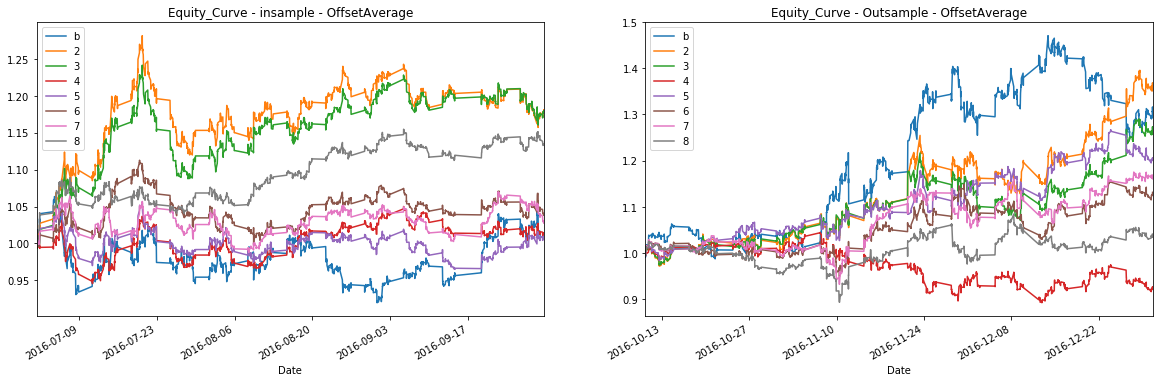

In [36]:
Ru_15min_Offset_Average_0bps = OffSetAverage(FixedCost_Result_Group[0e-4])

Benchmark = Ru_15min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ru_15min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [37]:
Ru_15min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.280375,0.002705,-0.002837,0.004741,0.000245,-0.016223,0.041657,-0.134361,1.672884,2.456314,707.8,1.177830,0.406599
1,0.283030,0.002673,-0.003096,0.005147,0.000295,-0.017507,0.037914,-0.131369,1.668005,2.403240,636.8,1.175328,0.409608
2,0.270565,0.000270,-0.003485,0.004489,0.000071,-0.034378,0.026188,-0.159498,1.289502,0.341639,638.6,1.016824,0.445222
3,0.268170,0.000204,-0.003273,0.004244,0.000022,-0.035888,0.029791,-0.153362,1.300771,0.198767,680.4,1.006348,0.438084
4,0.259361,0.000664,-0.003450,0.004259,0.000072,-0.030357,0.030522,-0.150910,1.238922,0.731171,668.0,1.038065,0.456989
5,0.285782,0.000485,-0.003150,0.004030,0.000040,-0.028808,0.025477,-0.152662,1.287123,0.594229,764.4,1.044419,0.443679
6,0.274359,0.002009,-0.003131,0.004106,0.000177,-0.027829,0.027420,-0.154799,1.317947,1.806258,748.2,1.156739,0.456623


In [38]:
Ru_15min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.363931,0.005467,-0.004102,0.006636,0.000504,-0.038153,0.066856,-0.112135,1.622511,3.747493,652.8,1.363059,0.428545
1,0.335423,0.004216,-0.004434,0.007142,0.000460,-0.036515,0.060373,-0.133693,1.611391,3.139315,587.2,1.264139,0.422120
2,0.394552,-0.001101,-0.005424,0.006267,-0.000176,-0.057518,0.043958,-0.250081,1.186049,-0.790934,605.0,0.979130,0.449577
3,0.409383,0.003323,-0.004916,0.006217,0.000310,-0.053186,0.054443,-0.123109,1.265944,2.048409,627.6,1.197552,0.469733
4,0.421042,0.002238,-0.005182,0.006268,0.000204,-0.050043,0.055195,-0.188726,1.212805,1.291283,617.6,1.133379,0.471152
5,0.437145,0.002713,-0.004748,0.005709,0.000226,-0.044011,0.047855,-0.177785,1.207619,1.565733,707.2,1.159628,0.475872
6,0.411351,0.000719,-0.005047,0.005482,0.000064,-0.036683,0.055953,-0.180780,1.087187,0.450757,698.2,1.046284,0.485353


## Summary

### 1) 2-order model gives the most stable good performances. 
### 2) under 2-order model Threshold = 10bps and Threshold = 10 both give comparable results